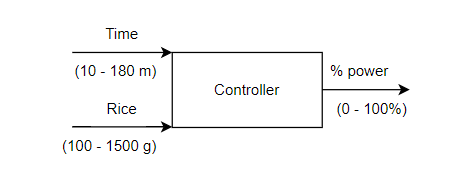

In [46]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

import warnings
warnings.filterwarnings("ignore")

# Set up Membership

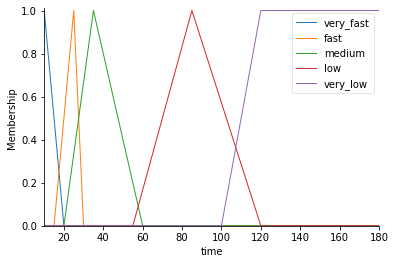

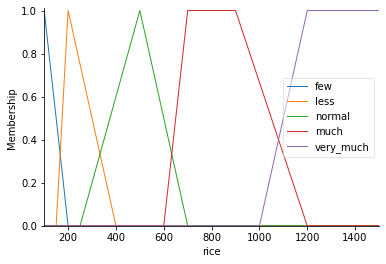

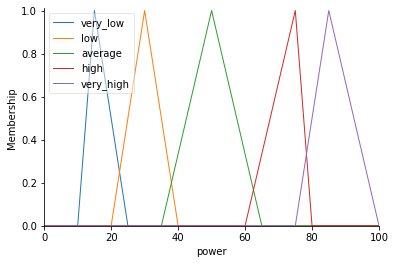

In [47]:
# input
time_cooker = ctrl.Antecedent(np.arange(10,181,1),'time')
rice = ctrl.Antecedent(np.arange(100,1501,1),'rice')

# output
power = ctrl.Consequent(np.arange(0,101,1),'power')

# config membership

# Time cooker:
time_cooker['very_fast'] = fuzz.trimf(time_cooker.universe,[10,10,20])
time_cooker['fast'] = fuzz.trimf(time_cooker.universe,[15,25,30])
time_cooker['medium'] = fuzz.trimf(time_cooker.universe,[20,35,60])
time_cooker['low'] = fuzz.trimf(time_cooker.universe,[55,85,120])
time_cooker['very_low'] = fuzz.trapmf(time_cooker.universe,[100,120,180,180])

# Rice:
rice['few'] = fuzz.trimf(rice.universe, [100,100,200])
rice['less'] = fuzz.trimf(rice.universe, [150,200,400])
rice['normal'] = fuzz.trimf(rice.universe, [250,500,700])
rice['much'] = fuzz.trapmf(rice.universe, [600,700,900,1200])
rice['very_much'] = fuzz.trapmf(rice.universe, [1000, 1200, 1500, 1500])

# Power:
power['very_low'] = fuzz.trimf(power.universe, [10,15,25])
power['low'] = fuzz.trimf(power.universe, [20,30,40])
power['average'] = fuzz.trimf(power.universe, [35,50,65])
power['high'] = fuzz.trimf(power.universe, [60,75,80])
power['very_high'] = fuzz.trimf(power.universe, [75, 85,100])



time_cooker.view()
rice.view()
power.view()

# Set up rules

| **Rice\Time** 	| **Very fast** 	| **Fast**     	| **Medium**    	| **Low**   	| **Very low** 	|
|-----------	|-----------	|-----------	|----------	|---------	|----------	|
| **Few**       	| Low       	| Low       	| Very low 	| Average 	| Average  	|
| **Less**      	| Low       	| Low       	| Low      	| Average 	| Average  	|
| **Normal**    	| High      	| High      	| Average  	| Average 	| Average  	|
| **Much**      	| Very high 	| High      	| Average  	| Average 	| Average  	|
| **Very much** 	| Very high 	| Very high 	| Average  	| Average 	| Average  	|

In [48]:
rule1 = ctrl.Rule(time_cooker['very_fast'] & rice['few'], power['low'])
rule2 = ctrl.Rule(time_cooker['very_fast'] & rice['less'], power['low'])
rule3 = ctrl.Rule(time_cooker['very_fast'] & rice['normal'], power['high'])
rule4 = ctrl.Rule(time_cooker['very_fast'] & rice['much'], power['very_high'])
rule5 = ctrl.Rule(time_cooker['very_fast'] & rice['very_much'], power['very_high'])

rule6 = ctrl.Rule(time_cooker['fast'] & rice['few'], power['low'])
rule7 = ctrl.Rule(time_cooker['fast'] & rice['less'], power['low'])
rule8 = ctrl.Rule(time_cooker['fast'] & rice['normal'], power['high'])
rule9 = ctrl.Rule(time_cooker['fast'] & rice['much'], power['high'])
rule10 = ctrl.Rule(time_cooker['fast'] & rice['very_much'], power['very_high'])

rule11 = ctrl.Rule(time_cooker['medium'] & rice['few'], power['very_low'])
rule12 = ctrl.Rule(time_cooker['medium'] & rice['less'], power['low'])
rule13 = ctrl.Rule(time_cooker['medium'] & rice['normal'], power['average'])
rule14 = ctrl.Rule(time_cooker['medium'] & rice['much'], power['average'])
rule15 = ctrl.Rule(time_cooker['medium'] & rice['very_much'], power['average'])

rule16 = ctrl.Rule(time_cooker['low'] & rice['few'], power['average'])
rule17 = ctrl.Rule(time_cooker['low'] & rice['less'], power['average'])
rule18 = ctrl.Rule(time_cooker['low'] & rice['normal'], power['average'])
rule19 = ctrl.Rule(time_cooker['low'] & rice['much'], power['average'])
rule20 = ctrl.Rule(time_cooker['low'] & rice['very_much'], power['average'])

rule21 = ctrl.Rule(time_cooker['very_low'] & rice['few'], power['average'])
rule22 = ctrl.Rule(time_cooker['very_low'] & rice['less'], power['average'])
rule23 = ctrl.Rule(time_cooker['very_low'] & rice['normal'], power['average'])
rule24 = ctrl.Rule(time_cooker['very_low'] & rice['much'], power['average'])
rule25 = ctrl.Rule(time_cooker['very_low'] & rice['very_much'], power['average'])



power_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10
                                ,rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20
                                ,rule21, rule22, rule23, rule24, rule25])
power_ctrl = ctrl.ControlSystemSimulation(power_ctrl)

Power of 60 minutes and 1000 gam rice is 50.00


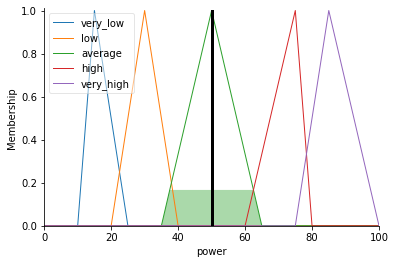

In [51]:
power_ctrl.input['time'] = 60
power_ctrl.input['rice'] = 1000

power_ctrl.compute()
print(f"Power of {60} minutes and {1000} gam rice is {power_ctrl.output['power']:.2f}")
power.view(sim = power_ctrl)